In [340]:
!pip install japanize-matplotlib
import japanize_matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import datetime
from matplotlib.ticker import ScalarFormatter

In [341]:
gb_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
gb_df["date"]=pd.to_datetime(gb_df["date"], format="%Y-%m-%d")
gb_df = gb_df.set_index(["location", "date"])
gb_df = gb_df.drop(columns=['continent', 'iso_code', 'tests_units'])
ct_set = gb_df.index.get_level_values(0).unique().values

for c in gb_df.columns:
  if c in ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'weekly_hosp_admissions', 'new_tests', 'total_tests', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'population']:
    gb_df[c] = pd.to_numeric(gb_df[c], errors='coerce') 
    gb_df[c] = gb_df[c].fillna(0)
    gb_df[c] = gb_df[c].astype(int)
  else:
    gb_df[c] = pd.to_numeric(gb_df[c], errors='coerce') 
    gb_df[c] = gb_df[c].fillna(0)
    gb_df[c] = gb_df[c].astype(float)

def fancy_ax(ax):
  ax = plt.gca()
  ax.xaxis.set_major_locator(mdates.MonthLocator()) 
  ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
  ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5)
  plt.setp(ax.get_xticklabels(which='major'))
  return ax

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: callable
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font_properties: `.font_manager.FontProperties`
  fontsize or size: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or weight: {a numeric

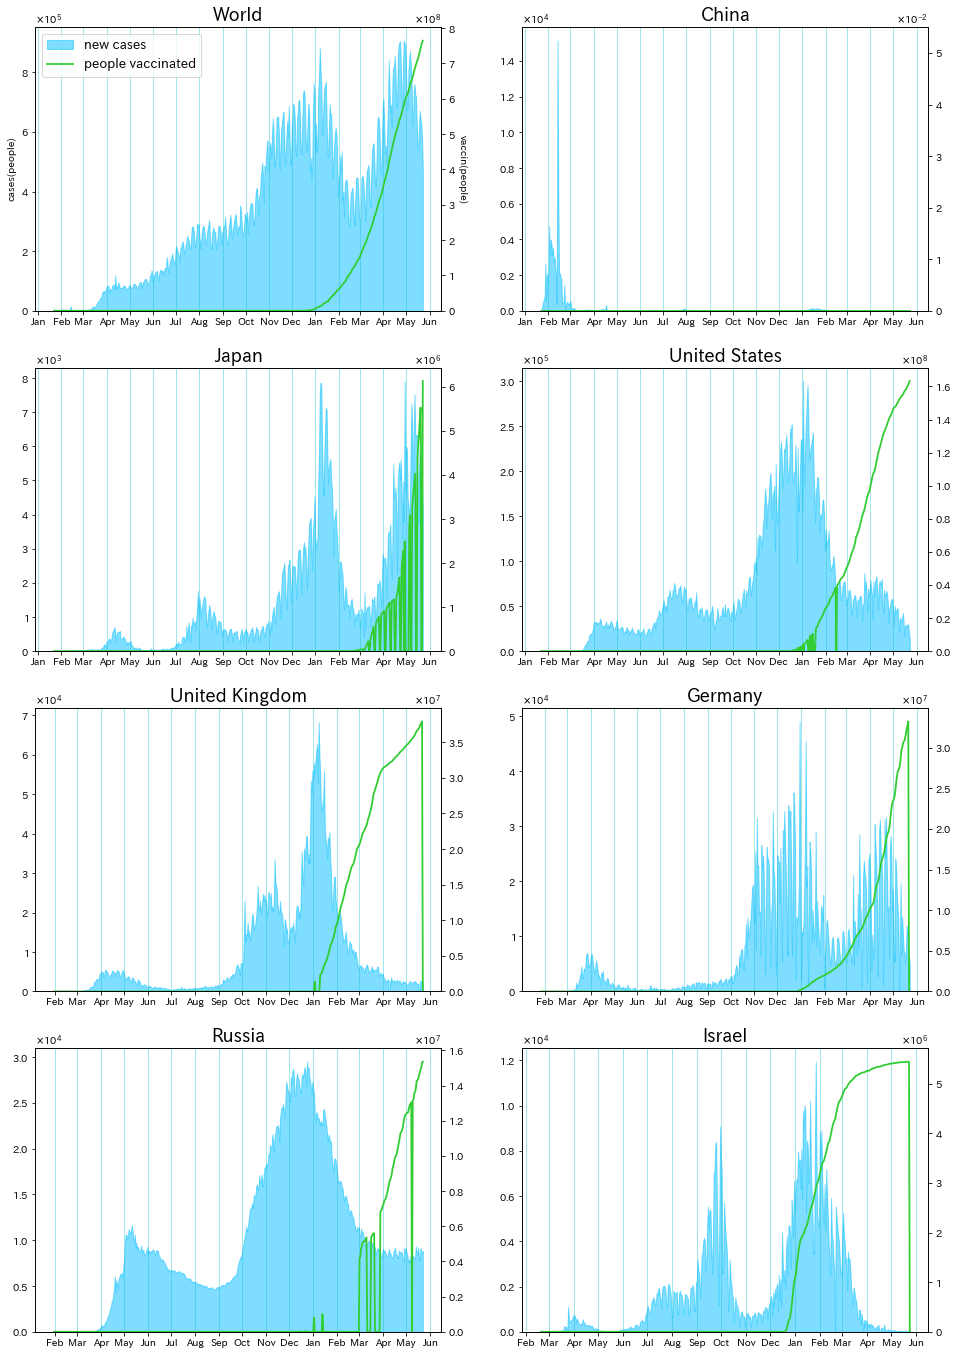

In [342]:
ct_set1 = ["World", "China", "Japan", "United States", "United Kingdom", "Germany", "Russia", "Israel"]
cols = 2
rows = np.ceil(len(ct_set1)/cols)
fig = plt.figure(figsize=(8*cols, 6*rows))

for (cid, country) in enumerate(ct_set1):
    window = 7
    ct_df = gb_df.loc[country] 
    pos = ct_df["total_cases"] 
    dea = ct_df["total_deaths"] 
    new_pos = ct_df["new_cases"] 
    vac = ct_df["people_vaccinated"]
    new_vac = ct_df["new_vaccinations"]

    ax1 = fig.add_subplot(rows, cols, cid+1)
    ax1.fill_between(new_pos.index, new_pos, label="new cases", color='deepskyblue', linewidth=1, alpha=0.5, zorder=0)
    ax1.set_ylim(0,)
    ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax1.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    ax1.set_title(country, size=18)
    ax1 = fancy_ax(ax1)
    ax2 = ax1.twinx()
    ax2.plot(vac, label="people vaccinated", color='limegreen', linewidth=1.8, zorder=1, alpha=1.0)
    ax2.set_ylim(0,)
    ax2 = fancy_ax(ax2)
    ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax2.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    if cid == 0:
        ax1.set_ylabel("cases(people)")
        ax2.set_ylabel("vaccin(people)", labelpad=11, rotation=270)
        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1+h2, l1+l2, loc='upper left', prop={'size':13})

fig.savefig("C1TB1137_global-01.pdf", bbox_inches="tight")

In [343]:
gb_df_ct = gb_df.drop(["World", "Africa", "Asia", "Europe", 'European Union', "North America", "Oceania", "South America"])
rank = 10
top_dpm = gb_df_ct["total_deaths_per_million"].groupby("location").last() 
top_dpm = top_dpm.sort_values(ascending=False).head(rank) 

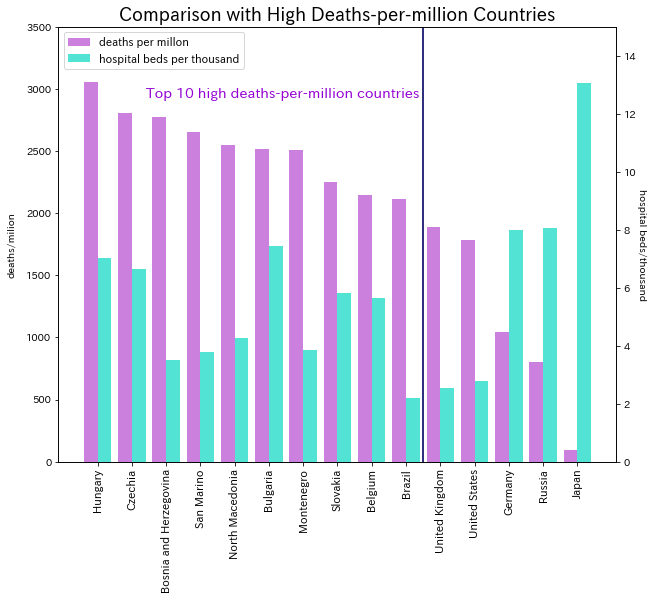

In [344]:
ct_set2 = ['Hungary', 'Czechia', 'Bosnia and Herzegovina', 'San Marino', 'North Macedonia', 'Bulgaria', 'Montenegro', 'Slovakia', 'Belgium', 'Brazil', "United Kingdom", "United States", "Germany", "Russia", "Japan"]
ct_set2_df = gb_df[["total_deaths_per_million", "hospital_beds_per_thousand"]].groupby("location").last()
ct_set2_df = ct_set2_df[ct_set2_df.index.isin(ct_set2)]
ct_set2_df = ct_set2_df.sort_values("total_deaths_per_million", ascending=False)
dpm = ct_set2_df["total_deaths_per_million"]
hbpm = ct_set2_df["hospital_beds_per_thousand"]

fig = plt.figure(figsize=(10,8)) 
plt.bar(ct_set2_df.index, dpm, align="edge", width=-0.4, color='mediumorchid', alpha=0.75, label="deaths per millon")
ax1 = plt.gca()
ax1.set_ylim(0,3500)
ax2 = plt.twinx(ax1)
ax2.bar(ct_set2_df.index, hbpm, align="edge", width=0.4, color='turquoise', alpha=0.9, label="hospital beds per thousand")
ax2.set_ylim(0,15)
plt.setp(ax1.get_xticklabels(), rotation=90, fontsize=11)
ax1.set_title("Comparison with High Deaths-per-million Countries", size=18)
ax1.set_ylabel("deaths/milion", labelpad=10)
ax2.set_ylabel("hospital beds/thousand", labelpad=10, rotation=270)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper left', prop={'size':11})
ax1.text(0.1, 0.989, "Top 10 high deaths-per-million countries", size=14.2, color='darkviolet', transform=ax.transAxes)
plt.vlines(x=9.5, ymin=0, ymax=3000, linewidth=1.8, color='midnightblue')

fig.savefig("C1TB1137_global-02.pdf", bbox_inches="tight")